<h1>Convolutional Neural Network (CNN)</h1>

We first import the libraries we will need to implement the CNN model.

In [1]:
# import keras library ... we will be using it to create the CNN model
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Then, we initialize the image data generator class to transform the images we need to classify. For both the training and testing dataset, we apply the same adjustments. 
    <tb><li> center the image
    <br><li> zoom into the image by a factor of 0.1
    <br><li> flip the images horizontally
    <br><li> rescale to normalize the images to a range of 0-255
    <br><li> shift the width by a factor of 0.15
    <br><li> shift the height by a factor of 0.15

In [2]:
# initialize ImageDataGenerator class

# for training set
train_datagen = ImageDataGenerator(
    samplewise_center=True, # Center image
    zoom_range=0.10, # Zooming rate of the image
    horizontal_flip=True, # Make a horizontal copy
    rescale=1.0/255.0, # Normalize the new images
    width_shift_range=0.15, # Percentage of width shifting
    height_shift_range=0.15 # Percentage of height shifting
)

# for testing set
test_datagen = ImageDataGenerator(
    samplewise_center=True, # Center image
    zoom_range=0.10, # Zooming rate of the image
    horizontal_flip=True, # Make a horizontal copy
    rescale=1.0/255.0, # Normalize the new images
    width_shift_range=0.15, # Percentage of width shifting
    height_shift_range=0.15 # Percentage of height shifting
)

Now, we're importing the images from each dataset and adjusting them using the setting specified above. Note, we're using rgb images and resizing each to 64x64 pixels. 

In [3]:
# import the training set & apply transformations
train_generator = train_datagen.flow_from_directory(
    directory="xray_dataset_covid19/train/",
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

# import the testing set & apply transformations
test_generator = test_datagen.flow_from_directory(
    directory="xray_dataset_covid19/test/",
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


We can then initialize the CNN model that we will use to predict the classification of our images. The model will have two hidden layers - the specifications for each differ by the number of filters used. The rest of the specifications are the same. <br>
(Convolution layer - kernel/filter size = 3x3, on rgb image (3), activation function = ReLU
<br>Pooling layer - pool/subset size = 2x2) <br>

The fully connected layer will also implement the ReLU activation function as a hidden layer. Finally, the output layer will use an the softmax method to make predictions.

In [4]:
#initialize cnn model
cnn = Sequential()

# HIDDEN LAYER 1
# CONVOLUTION LAYER - 16 filters, kernel size 3*3, ReLU activation layer
cnn.add(Conv2D(16, (3,3), input_shape=(64,64,3), activation='relu'))
# POOLING LAYER - subset size 2*2
cnn.add(MaxPooling2D(pool_size=(2,2)))

# HIDDEN LAYER 2
# CONVOLUTION LAYER - 32 filters, kernel size 3*3, ReLU activation layer
cnn.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'))
# POOLING LAYER - subset size 2*2
cnn.add(MaxPooling2D(pool_size=(2,2)))

# note: tried 3 layers ... performs better with 2
# # HIDDEN LAYER 3
# # CONVOLUTION LAYER - 16 filters, kernel size 5*5, ReLU activation layer
# cnn.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation='relu'))
# # POOLING LAYER - kernel size 2*2
# cnn.add(MaxPooling2D(pool_size=(2,2)))

# FULLY CONNECTED LAYER - output
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(2, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

Now, we can fit our model to our dataset. Note it was initially implemented with earlystopping to prevent overfitting, but this prevented us from running the 20 epochs we need for the analysis in the next section, so it was left out. 

In [5]:
# compile model with loss function & fit model to data

# compile cnn model ... use cross entropy as loss function, use adam to optimize learning of params, use accuracy metrics
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# create early stopping callback function ... will wait 6 epochs to see if any improvement in model
# NOTE: REMOVED FROM IMPLEMENTATION TO RUN 20 EPOCHS FOR PART 3
earlystop=EarlyStopping(patience=6)

# conduct fitting of model to data for 20 epochs with earlystopping
# epochs = # times we iterate model through entire data
fitted_model = cnn.fit(train_generator, validation_data=test_generator, epochs=20, steps_per_epoch=len(train_generator), validation_steps=len(test_generator))

Epoch 1/20
148/148 [==============================] - 5s 33ms/step - loss: 0.4980 - accuracy: 0.7973 - val_loss: 0.0928 - val_accuracy: 0.9750
Epoch 2/20
148/148 [==============================] - 5s 34ms/step - loss: 0.3013 - accuracy: 0.9054 - val_loss: 0.1931 - val_accuracy: 0.8750
Epoch 3/20
148/148 [==============================] - 5s 35ms/step - loss: 0.2716 - accuracy: 0.8986 - val_loss: 0.1670 - val_accuracy: 0.9500
Epoch 4/20
148/148 [==============================] - 6s 38ms/step - loss: 0.2475 - accuracy: 0.9054 - val_loss: 0.0917 - val_accuracy: 0.9500
Epoch 5/20
148/148 [==============================] - 7s 48ms/step - loss: 0.2312 - accuracy: 0.9257 - val_loss: 0.1300 - val_accuracy: 0.9250
Epoch 6/20
148/148 [==============================] - 8s 51ms/step - loss: 0.2941 - accuracy: 0.9122 - val_loss: 0.1516 - val_accuracy: 0.9750
Epoch 7/20
148/148 [==============================] - 7s 46ms/step - loss: 0.2312 - accuracy: 0.9189 - val_loss: 0.2460 - val_accuracy: 0.9000

We plot the training and validation accuracy and loss over 20 epochs of the model run. 

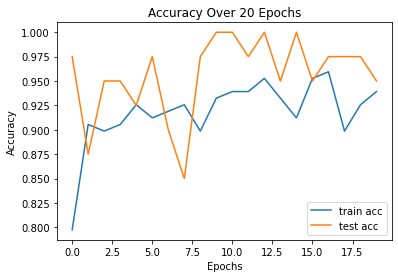

In [6]:
# create accuracy graph

plt.plot(fitted_model.history['accuracy'], label='train acc')
plt.plot(fitted_model.history['val_accuracy'], label='test acc')
plt.ylabel('Accuracy') 
plt.xlabel('Epochs') 
plt.title("Accuracy Over 20 Epochs")
plt.legend()
plt.show()
# plt.savefig('AccVal')

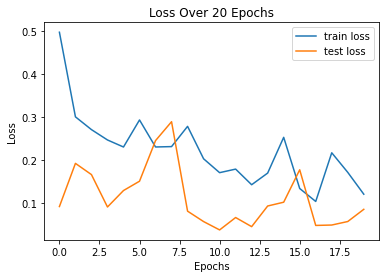

In [7]:
# create loss graph

plt.plot(fitted_model.history['loss'], label='train loss')
plt.plot(fitted_model.history['val_loss'], label='test loss')
plt.ylabel('Loss') 
plt.xlabel('Epochs') 
plt.title("Loss Over 20 Epochs")
plt.legend()
plt.show()
# plt.savefig('LossVal')

Before we analyze the graphs to determine if overfitting is occurring, let's quickly define overfitting. Overfitting will occur when the model learns the patterns from the training set <i>too</i> well, such that it is unable to generalize on datapoints that are not found in the training set.

We can see from the graphs that both training and testing accuracy are quite high (averaging in the 90% range). Overfitting normally occurs when the training accuracy is extremely high while the testing accuracy is low - which is not the case here. Furthermore, the model tends to have a higher testing accuracy than training accuracy, indicating that the model is able to generalize very well, which is not a trait of an overfitted model. 

The loss graph correlates to the results from the accuracy graph. Note that when the accuracy graph is at a maximum, the loss graph is at a minimum. If the model was overfitting, we would see the training loss fall while testing loss increases. Although we see a large drop in training loss, the testing loss remains relatively constant - so again, overfitting does not occur here.